## 运行版本

In [1]:
import sys

sys.version

'3.8.13 (default, Mar 28 2022, 06:59:08) [MSC v.1916 64 bit (AMD64)]'

In [2]:
import tensorflow

tensorflow.__version__

'2.6.0'

In [3]:
# !python -m deepxde.backend.set_default_backend tensorflow.compat.v1


In [4]:
import deepxde

deepxde.__version__

Using backend: tensorflow.compat.v1



Instructions for updating:
non-resource variables are not supported in the long term



'1.1.3'

## 4 Wave Equation

下面我们讨论波动方程 $$\large u_{tt}-\Delta u = 0, \tag{4.1}$$ 

和非齐次形式 $$\large u_{tt}-\Delta u = f,\tag{4.2}$$ 

的解, 其中给定一定的初始和边界条件. 这里 $t>0,x\in U,U\subset \mathbb{R}^n$。要解的东西是 $\large u:\bar{U} \times[0,\infty) \to \mathbb{R}, u = u(x,t)$。这里拉普拉斯算子是关于空间变量 $x = (x_1,\cdots,x_n)$ 的。另外 $f:U \times[0,\infty) \to \mathbb{R}$ 给定. 通常我们也记 $\Box u := u_{tt} - \Delta u$。



### 4.1 1维情形: d'Alembert公式

**定理1.1 [d'Alembert公式] [一维波动方程的解]** 设 $\large g \in C^2(\mathbb{R}), h \in C^1(\mathbb{R})$，定义

$\large u(x,t) = \frac{1}{2} [g(x+t)+g(x-t)] + \frac{1}{2} \int^{x+t}_{x-t}h(y)dy, \tag{4.3}$ 

则：

（1） $\large u\in C^2(\mathbb{R} \times [0,\infty))$，

（2）$\large u_{tt} - u_{xx} = 0, (x,t) \in \mathbb{R}\times (0,\infty)$，

（3）$\large \lim_{(x,t)\to (x^0,0^+)} u(x,t) = g(x^0), \lim_{(x,t)\to (x^0,0)} u_t(x,t) = h(x^0), \forall x^0 \in \mathbb{R}$。



### 4.2 3维情形: Kirchhoff公式

对 $x\in \mathbb{R}^3, t>0,$ 
$$
\large
\begin{align*}
u(x,t) &= \frac{1}{n\alpha(n)t^{n-1}} \int_{\partial B(x,t)} th(y)+g(y)+Dg(y)\cdot (y-x)dS(y)。\\
\tag{4.4}
\end{align*}
$$
这就是三维情形的**Kirchhoff公式**。

### 4.3 2维情形: Poisson公式

对 $x\in \mathbb{R}^2, t>0,$ 
$$
\large
\begin{align*}
u(x,t) &= \frac{1}{2\pi t} \int_{B(x,t)} \frac{g(y)+th(y)+Dg(y)\cdot (y-x)}{(t^2-|y-x|^2)^{1/2}} dy,\\
\tag{4.5}
\end{align*}
$$
这就是二维情形下的Poisson公式。



### 问题设置
我们考虑一维波动方程的形式:
$$
\large
\begin{aligned}
&u_{tt}(x,t)-100u_{xx}(x,t)=0,(x,t)∈(0,1)\times(0,1), \\ 
&u(0,t)=u(1,t)=0, t∈[0,1],\\
&u(x,0)=\sin(\pi x)+\sin(2\pi x), x∈[0,1],\\
&u_t(x,0)=0, x∈[0,1],\\
\end{aligned}
\tag{4.6}
$$
使用d'Alembert公式求得方程的解是 $$\large u(x,t)=\sin(πx)\cos(10πt)+\sin(2πx)\cos(20πt).$$  

mathematica求解代码

```mathematica
WaveEquation = D[u[x, t], {t, 2}] - 100*D[u[x, t], {x, 2}] == 0;
bc = {u[0, t] == 0, u[1, t] == 0};
ic = {u[x, 0] == Sin[Pi * x] + Sin[2*Pi*x], 
   Derivative[0, 1][u][x, 0] == 0};

sol = DSolve[{WaveEquation, bc, ic}, u[x, t], {x, t}]
(*{{u[x, t] -> (Cos[10 \[Pi] t] + 2 Cos[20 \[Pi] t] Cos[\[Pi] x]) Sin[\[Pi] x]}}*)
```





## 代码来源
https://github.com/lululxvi/deepxde/blob/master/examples/pinn_forward/wave_1d.py

https://github.com/PredictiveIntelligenceLab/MultiscalePINNs/blob/main/wave1D/wave1D.py

In [1]:
"""Backend supported: tensorflow.compat.v1
Implementation of the wave propagation example in paper https://arxiv.org/abs/2012.10047.
References:
    https://github.com/PredictiveIntelligenceLab/MultiscalePINNs.
"""
import deepxde as dde
import numpy as np

Using backend: tensorflow.compat.v1



Instructions for updating:
non-resource variables are not supported in the long term



波动方程

$\large u_{tt}(x,t)-100u_{xx}(x,t)=0,(x,t)∈(0,1)\times(0,1)$

In [2]:
C = 10

def pde(x, y):
    dy_tt = dde.grad.hessian(y, x, i=1, j=1)
    dy_xx = dde.grad.hessian(y, x, i=0, j=0)
    return dy_tt - C ** 2 * dy_xx

geom = dde.geometry.Interval(0, 1)
timedomain = dde.geometry.TimeDomain(0, 1)
geomtime = dde.geometry.GeometryXTime(geom, timedomain)

边界、初始条件：

bc: $\large u(0,t)=u(1,t)=0, t∈[0,1],$

ic_1: $\large u(x,0)=\sin(\pi x)+\sin(2\pi x), x∈[0,1],$

ic_2: $\large u_t(x,0)=0, x∈[0,1],$

方程的解：

func: $\large u(x,t)=\sin(πx)\cos(10πt)+\sin(2πx)\cos(20πt).$

In [3]:
A = 2

def func(x):
    x, t = np.split(x, 2, axis=1)
    return np.sin(np.pi * x) * np.cos(C * np.pi * t) +\
            np.sin(A * np.pi * x) * np.cos(A * C * np.pi * t)

bc = dde.icbc.DirichletBC(geomtime, func, lambda _, on_boundary: on_boundary)
ic_1 = dde.icbc.IC(geomtime, func, lambda _, on_initial: on_initial)
# do not use dde.NeumannBC here, since `normal_derivative` does not work with temporal coordinate.
ic_2 = dde.icbc.OperatorBC(
    geomtime,
    lambda x, y, _: dde.grad.jacobian(y, x, i=0, j=1),
    lambda x, _: np.isclose(x[1], 0),
)
data = dde.data.TimePDE(
    geomtime,
    pde,
    [bc, ic_1, ic_2],
    num_domain=360,
    num_boundary=360,
    num_initial=360,
    solution=func,
    num_test=10000,
)

G:\Anaconda3\envs\py3.8\lib\site-packages\skopt\sampler\sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+362=362. 
  warnings.warn("The balance properties of Sobol' points require "


model

如果发生错误：
AttributeError: module 'deepxde.nn.tensorflow' has no attribute 'STMsFFN'

把deepxde后端换成tensorflow_compat_v1

https://deepxde.readthedocs.io/en/latest/modules/deepxde.nn.tensorflow_compat_v1.html#deepxde.nn.tensorflow_compat_v1.msffn.STMsFFN

In [4]:
layer_size = [2] + [100] * 3 + [1]
activation = "tanh"
initializer = "Glorot uniform"
net = dde.nn.STMsFFN(
    layer_size, activation, initializer, sigmas_x=[1], sigmas_t=[1, 10]
)
net.apply_feature_transform(lambda x: (x - 0.5) * 2 * np.sqrt(3))

model = dde.Model(data, net)

compile

In [5]:
def get_initial_loss(model):
    model.compile("adam", lr=0.001, metrics=["l2 relative error"])
    losshistory, train_state = model.train(0)
    return losshistory.loss_train[0]

initial_losses = get_initial_loss(model)
loss_weights = 5 / initial_losses
model.compile(
    "adam",
    lr=0.001,
    metrics=["l2 relative error"],
    loss_weights=loss_weights,
    decay=("inverse time", 2000, 0.9),
)


Compiling model...
Building Spatio-temporal Multi-scale Fourier Feature Network...


G:\Anaconda3\envs\py3.8\lib\site-packages\keras\legacy_tf_layers\core.py:236: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  warnings.warn('`tf.layers.dense` is deprecated and '
G:\Anaconda3\envs\py3.8\lib\site-packages\keras\engine\base_layer_v1.py:1676: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '


'compile' took 3.664090 s

Initializing variables...
Training model...

Step      Train loss                                  Test loss                                   Test metric   
0         [4.99e+05, 7.72e-02, 6.54e-01, 1.87e+01]    [6.58e+05, 7.72e-02, 6.54e-01, 1.87e+01]    [1.05e+00]    

Best model at step 0:
  train loss: 4.99e+05
  test loss: 6.58e+05
  test metric: [1.05e+00]

'train' took 0.814490 s

Compiling model...
'compile' took 1.414812 s



model.train

In [6]:
pde_residual_resampler = dde.callbacks.PDEResidualResampler(period=1)
losshistory, train_state = model.train(
    epochs=10000, callbacks=[pde_residual_resampler], display_every=500
)

Initializing variables...
Training model...

Step      Train loss                                  Test loss                                   Test metric   
0         [3.97e+00, 1.98e+00, 5.89e+00, 2.51e+00]    [4.18e+00, 1.98e+00, 5.89e+00, 2.51e+00]    [1.02e+00]    
500       [6.48e-02, 5.62e-03, 1.49e-03, 4.54e-04]    [1.75e-01, 5.62e-03, 1.49e-03, 4.54e-04]    [7.95e-01]    
1000      [2.86e-02, 3.05e-03, 3.48e-04, 3.56e-03]    [7.73e-02, 3.05e-03, 3.48e-04, 3.56e-03]    [7.13e-01]    
1500      [1.56e-02, 2.22e-03, 1.82e-04, 1.07e-03]    [5.26e-02, 2.22e-03, 1.82e-04, 1.07e-03]    [6.47e-01]    
2000      [1.41e-02, 1.67e-03, 5.99e-05, 5.11e-04]    [4.10e-02, 1.67e-03, 5.99e-05, 5.11e-04]    [5.84e-01]    
2500      [1.02e-02, 1.33e-03, 5.52e-05, 8.89e-04]    [3.19e-02, 1.33e-03, 5.52e-05, 8.89e-04]    [5.25e-01]    
3000      [9.11e-03, 9.81e-04, 3.69e-05, 1.02e-04]    [2.49e-02, 9.81e-04, 3.69e-05, 1.02e-04]    [4.64e-01]    
3500      [6.27e-03, 7.61e-04, 1.41e-05, 6.97e-05] 

saveplot

Saving loss history to E:\noetbook\毕业论文\loss.dat ...
Saving training data to E:\noetbook\毕业论文\train.dat ...
Saving test data to E:\noetbook\毕业论文\test.dat ...


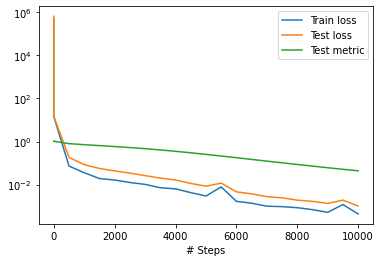

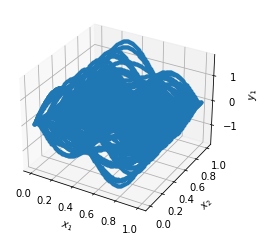

In [7]:
dde.saveplot(losshistory, train_state, issave=True, isplot=True)